In [1]:
import pandas as pd
import os

files = {
    'Electricity': [
        'grid_search_electricity_results_[True, False]_True_[1]_[1]_[1, 2, 6, 12, 24]_[True, False]_[True, False].csv',
    ],
    'Traffic': [
        'grid_search_traffic_results_[True, False]_True_[1]_[1]_[1, 2, 6, 12, 24]_[True, False]_[True, False].csv',
    ],
    'PeMSD7': [
        'grid_search_pems_results_[True, False]_True_[1]_[1]_[1, 2, 3, 5, 9]_[True, False]_[True, False].csv',
    ],
    'Exchange-Rate': [
        'grid_search_exchange_rate_results_[True, False]_True_[1]_[1]_[1, 2, 6, 12, 24]_[True, False]_[True, False].csv',
    ]
}

base_path = '../results/local_daikon/'

dfs = []
for dataset_name, file_list in files.items():
    for f in file_list:
        full_path = os.path.join(base_path, f)
        try:
            # Check if file exists before reading to avoid errors if paths differ
            if os.path.exists(full_path):
                df = pd.read_csv(full_path)
                df['dataset'] = dataset_name # Tag the rows
                dfs.append(df)
            else:
                print(f"Warning: File not found {full_path}")
        except Exception as e:
            print(f"Error reading {full_path}: {e}")

all_df = pd.concat(dfs, ignore_index=True)


In [2]:
all_df

,include_covariates,include_itself,include_motif_information,k_motifs,no_points_after_motif,do_normalization,include_similarity,RMSE,WAPE,MAE,MAPE,Time_Processing,Time_Overall,dataset
0,True,True,1,1,1,True,True,139.857000,0.094442,52.898056,inf,36.191687,270.853428,Electricity
1,True,True,1,1,1,True,False,139.504090,0.093986,52.642290,inf,37.243140,258.905965,Electricity
2,True,True,1,1,1,False,True,141.308350,0.095551,53.519142,inf,40.383315,265.937046,Electricity
3,True,True,1,1,1,False,False,138.730010,0.093408,52.318770,inf,35.945040,255.777969,Electricity
4,True,True,1,1,2,True,True,136.314560,0.094533,52.948734,inf,36.655271,291.549234,Electricity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,False,True,1,1,12,False,False,0.018714,0.015302,0.011438,0.047402,0.769788,7.006758,Exchange-Rate
156,False,True,1,1,24,True,True,0.019595,0.015723,0.011753,0.047165,0.983693,8.399197,Exchange-Rate
157,False,True,1,1,24,True,False,0.019624,0.015727,0.011755,0.047181,0.882192,8.409975,Exchange-Rate
158,False,True,1,1,24,False,True,0.018988,0.015436,0.011538,0.047515,0.864578,8.222693,Exchange-Rate


In [3]:
# Define Matching Columns
# These columns identify a unique model configuration (excluding the normalization setting)
group_cols = [
    'dataset', 
    'include_covariates', 
    'include_motif_information', 
    'include_similarity', 
    'k_motifs', 
    'no_points_after_motif'
]

metrics = ['RMSE', 'WAPE', 'MAE']

# 4. Pivot the Data
# We create a table where one column is the 'True' (Normalized) score and one is 'False' (Unnormalized)
pivot_df = all_df.pivot_table(index=group_cols, columns='do_normalization', values=metrics)
print(pivot_df.shape)

(80, 6)


In [4]:
pivot_df

MAE  \
do_normalization                                                                                                False   
dataset     include_covariates include_motif_information include_similarity k_motifs no_points_after_motif              
Electricity False              1                         False              1        1                      58.526413   
                                                                                     2                      58.552547   
                                                                                     6                      58.680813   
                                                                                     12                     56.835667   
                                                                                     24                     56.464330   
...                                                                                                               ...   
Traffic     True               1                         True               1        1                       0.006267   
                                                                                     2                       0.006325   
                                                                                     6                       0.006127   
                                                                                     12                      0.005439   
                                                                                     24                      0.003353   

                                                                                                                       \
do_normalization                                                                                                True    
dataset     include_covariates include_motif_information include_similarity k_motifs no_points_after_motif              
Electricity False              1                         False              1        1                      58.193530   
                                                                                     2                      58.712130   
                                                                                     6                      59.141224   
                                                                                     12                     58.485928   
                                                                                     24                     57.732216   
...                                                                                                               ...   
Traffic     True               1                         True               1        1                       0.006210   
                                                                                     2                       0.006205   
                                                                                     6                       0.006480   
                                                                                     12                      0.006291   
                                                                                     24                      0.005244   

                                                                                                                  RMSE  \
do_normalization                                                                                                 False   
dataset     include_covariates include_motif_information include_similarity k_motifs no_points_after_motif               
Electricity False              1                         False              1        1                      140.038530   
                                                                                     2                      140.940920   
                                                                                     6                      146.26

In [5]:
# Calculate Percentage Increase in Error
# Formula: ((Normalized - Unnormalized) / Unnormalized) * 100
# Positive value = Normalized has higher error (Unnormalized is better)
results = pd.DataFrame(index=pivot_df.index)

for m in metrics:
    # (Value_with_Norm - Value_without_Norm) / Value_without_Norm
    diff = (pivot_df[(m, True)] - pivot_df[(m, False)])
    pct_diff = (diff / pivot_df[(m, False)]) * 100
    results[f'{m}_pct_increase'] = pct_diff

# 6. Aggregate by Dataset (Mean)
summary = results.groupby('dataset')[[f'{m}_pct_increase' for m in metrics]].mean()

# 7. Print Results
print("-" * 60)
print("Impact of Normalization (Percentage Increase in Error)")
print("Positive values mean Normalization made the model WORSE.")
print("-" * 60)
print(summary.round(2))
print("-" * 60)

------------------------------------------------------------
Impact of Normalization (Percentage Increase in Error)
Positive values mean Normalization made the model WORSE.
------------------------------------------------------------
               RMSE_pct_increase  WAPE_pct_increase  MAE_pct_increase
dataset                                                              
Electricity                 0.20               0.78              0.78
Exchange-Rate               4.28               2.50              2.50
PeMSD7                      0.27               0.30              0.30
Traffic                    16.70              16.08             16.08
------------------------------------------------------------


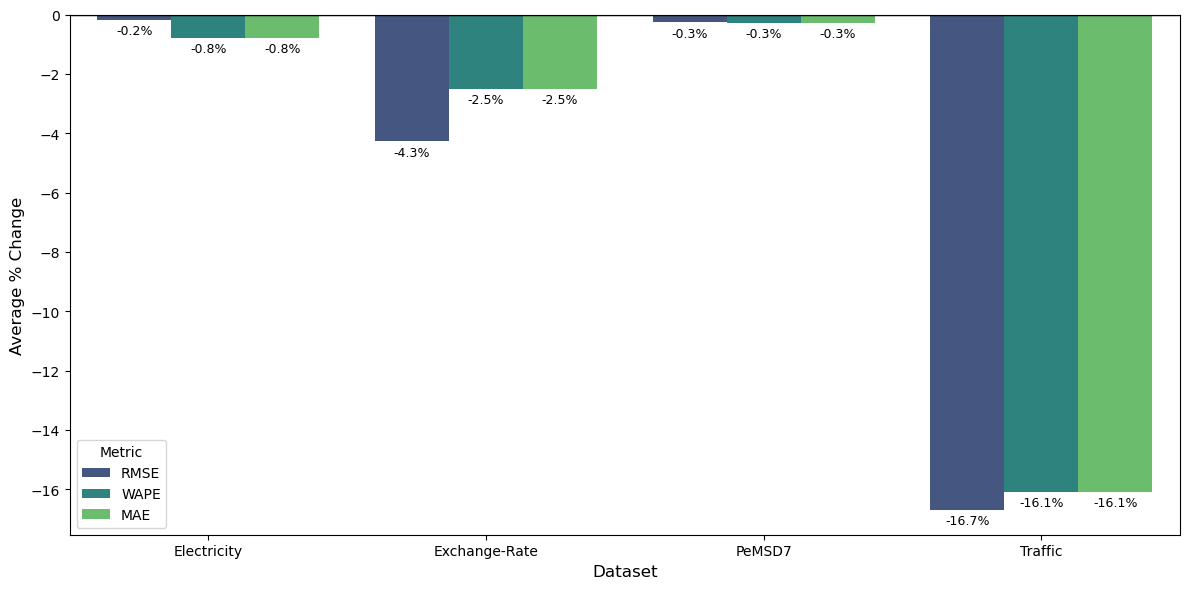

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
plot_df = results.copy().reset_index()

# Rename columns to just metrics for cleaner plotting key
rename_map = {f'{m}_pct_increase': m for m in metrics}
plot_df = plot_df.rename(columns=rename_map)

# Aggregate by Dataset (Mean)
avg_imp = plot_df.groupby('dataset')[metrics].mean().reset_index()

# Melt for Seaborn
melted_imp = avg_imp.melt(id_vars='dataset', value_vars=metrics, var_name='Metric', value_name='pct_increase')

# Invert values so the bars go downwards (as requested)
melted_imp['pct_increase'] = -melted_imp['pct_increase']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_imp, x='dataset', y='pct_increase', hue='Metric', palette='viridis')

plt.axhline(0, color='black', linewidth=1)
plt.ylabel('Average % Change', fontsize=12)
plt.xlabel('Dataset', fontsize=12)
# plt.title('Impact of Normalization on Error Metrics', fontsize=14, fontweight='bold')
plt.legend(title='Metric')

# Add values on bars
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%', padding=3, fontsize=9)

plt.tight_layout()
plt.savefig('../figures/original_vs_normalize.pdf')
plt.show()

In [7]:
import datetime

print(f"This notebook was last run end-to-end on: {datetime.datetime.now()}\n")

This notebook was last run end-to-end on: 2026-01-24 12:53:46.453446

